1.(50 points)Simulation in finding each other in a supermarket
(please leave your result under the cell)

1.1 (20 points)

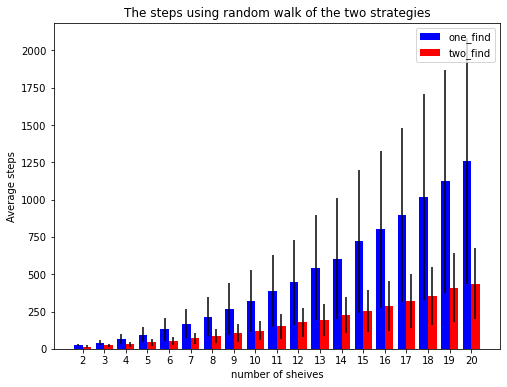

[1.57, 1.79, 2.12, 2.24, 2.39, 2.44, 2.42, 2.53, 2.64, 2.6, 2.5, 2.8, 2.68, 2.83, 2.81, 2.78, 2.87, 2.75, 2.88]
[3.62, 2.49, 1.89, 1.7, 1.51, 1.42, 1.38, 1.31, 1.22, 1.24, 1.24, 1.15, 1.15, 1.13, 1.11, 1.12, 1.09, 1.13, 1.09]
[5.66, 4.45, 3.99, 3.81, 3.59, 3.46, 3.35, 3.3, 3.22, 3.22, 3.11, 3.22, 3.09, 3.2, 3.13, 3.1, 3.14, 3.11, 3.15]


In [708]:
# Your Code Below
import random
import numpy as np
import matplotlib.pyplot as plt
###strategy1 : one stay and the other to find
mean_1 = []
std_1 = []

def where_to_go(pos=[], direction = [],trail = []):
    if pos[0] == 0:
        direction.remove(-1)
    if pos[0] == n:
        direction.remove(1)
    if pos[1] == 0:
        direction.remove(-2)
    if pos[1] == n:
        direction.remove(2)
    if trail != []:
        direction.remove(-trail[-1])
    trail.append(random.choice(direction))
    if trail[-1] == 1:
        pos[0]+=1
    if trail[-1] == -1:
        pos[0]-=1
    if trail[-1] == 2:
        pos[1]+=1
    if trail[-1] == -2:
        pos[1]-=1

    return pos,trail


for n in range(2,21):
    total_step = []
    for time in range(1000):
        per1 = [0,n]
        per2 = [n,0]
        x_mal = y_max = n
        x_min = y_min = 0
        step = 1
        trail = []
        trail.append(random.choice([1,-2]))
        if trail[-1] == 1:
            per1[0]+=1
        if trail[-1] == -2:
            per1[1]-=1
        while per1[0]!=per2[0] or per1[1]!=per2[1]:
            direction = [1,-1,2,-2]
            if per1[0] == per2[0]:
                step += abs(per1[1]-per2[1])
                break
            if per1[1] == per2[1]:
                step += abs(per1[0]-per2[0])
                break
            if per1[0] == 0:
                direction.remove(-1)
            if per1[0] == n:
                direction.remove(1)
            if per1[1] == 0:
                direction.remove(-2)
            if per1[1] == n:
                direction.remove(2)
            direction.remove(-trail[-1])
            trail.append(random.choice(direction))
            if trail[-1] == 1:
                per1[0]+=1
            if trail[-1] == -1:
                per1[0]-=1
            if trail[-1] == 2:
                per1[1]+=1
            if trail[-1] == -2:
                per1[1]-=1
            step += 1
        total_step.append(step*5)
    mean_step = np.mean(total_step)
    std_step = np.std(total_step,ddof = 1)

    mean_1.append(mean_step)
    std_1.append(round(std_step))
    
mean_2 = []
std_2 = []

for n in range(2,21):
    total_step = []
    for time in range(1000):
        per1 = [0,n]
        per2 = [n,0]
        x_mal = y_max = n
        x_min = y_min = 0
        step = 0
        trail_1 = []
        trail_2 = []
        while per1[0]!=per2[0] or per1[1]!=per2[1]:
            direction = [1,-1,2,-2]
            if per1[0] == per2[0]:
                step += abs(per1[1]-per2[1])/2
                break
            if per1[1] == per2[1]:
                step += abs(per1[0]-per2[0])/2
                break
            where_to_go(per1, direction,trail_1)
            direction = [1,-1,2,-2]
            where_to_go(per2,direction,trail_2)
            step+=1
        total_step.append(step*5)
    mean_step = np.mean(total_step)
    std_step = np.std(total_step,ddof = 1)

    mean_2.append(mean_step)
    std_2.append(round(std_step))
    


x = np.array([i for i in range(2,21)])
width = 0.4
fig = plt.figure(figsize = (8,6))
ax = plt.subplot()
plt.bar(x-width/2,mean_1,width = 0.4,yerr = std_1,label = 'one_find',color = 'b')
plt.bar(x+width/2,mean_2,width = 0.4,yerr = std_2,label = 'two_find',color = 'r')
ax.set_xticks(x)
ax.set_xlabel('number of sheives')
ax.set_ylabel('Average steps')
ax.set_title('The steps using random walk of the two strategies')
plt.legend()
plt.show()
size =  []
one_n = []
two_n = []
for i in range(len(mean_1)):
    size.append(round(mean_1[i]/mean_2[i],2))
    one_n.append(round(mean_1[i]/(i+2)**2,2))
    two_n.append(round(mean_2[i]/(i+2)**2,2))
    
print(size)
print(two_n)
print(one_n)

Conclusion: according to the bar chart above, it is ovbiously that the strategy one takes more steps to find each other, which means that strategy one is less effective than the strategy if both of them go to find each. At strategy two, since both of them are gradually going to the center of the supermarket(they are not allowed to go back), the steps they need to go become fewer. 

Because they need to go through both x-axis and y-axis (each edge's length is n), the number of steps they need to go is linear to n^2: 

Steps(one_find) = 3 * n^2 + k1 ;

Steps(two_find) = n * n^2 + k2

1.2 (20 points)

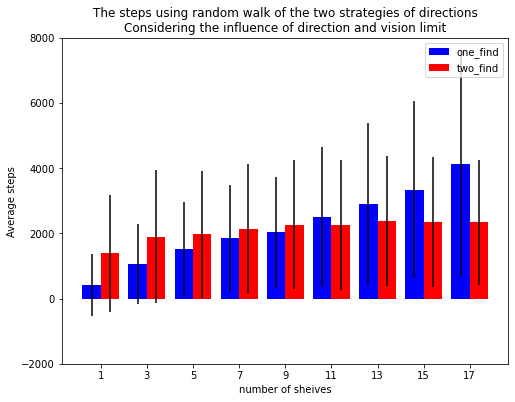

In [722]:
# Your Code Below
def where_to_go(pos=[], direction = [],trail = []):
    if pos[0] == 0:
        direction.remove(-1)
    if pos[0] == 19:
        direction.remove(1)
    if pos[1] == 0:
        direction.remove(-2)
    if pos[1] == 19:
        direction.remove(2)
   
    if trail != []:
#         print(direction,trail[-1])  
        direction.remove(-trail[-1])
    trail.append(random.choice(direction))
    if trail[-1] == 1:
        pos[0]+=1
    if trail[-1] == -1:
        pos[0]-=1
    if trail[-1] == 2:
        pos[1]+=1
    if trail[-1] == -2:
        pos[1]-=1

    return pos,trail

mean_1 = []
std_1 = []

for n in range(1,18,2):
    total_step = []
    for time in range(1000):
        per1 = [(19-n)//2,19-(19-n)//2]
        per2 = [19-(19-n)//2,(19-n)//2]
        step = 0
        trail_1 = []
        trail_2 = []
        while per1[0]!=per2[0] or per1[1]!=per2[1]:
            direction = [1,-1,2,-2]
            if trail_1 != [] and per1[0] == per2[0] and abs(per1[1] - per2[1]) == 1:
                step += 1
                break
            if trail_1 != [] and per1[1] == per2[1] and abs(per1[0] - per2[0]) == 1:
                step += 1
                break
            where_to_go(per1, direction,trail_1)
            direction = [1,-1,2,-2]
            step+=1
        total_step.append(step*5)
    mean_step = np.mean(total_step)
    std_step = np.std(total_step,ddof = 1)
    mean_1.append(mean_step)
    std_1.append(round(std_step))



mean_2 = []
std_2 = []

for n in range(1,18,2):
    total_step = []
    for time in range(1000):
        per1 = [(19-n)//2,19-(19-n)//2]
        per2 = [19-(19-n)//2,(19-n)//2]
        step = 0
        trail_1 = []
        trail_2 = []

        while per1[0]!=per2[0] or per1[1]!=per2[1]:
            direction = [1,-1,2,-2]
            if trail_1 != [] and per1[0] == per2[0] and trail_1[-1]!=-trail_2[-1] and abs(per1[1] - per2[1]) == 1:
                step += abs(per1[1]-per2[1])/2
                break
            if trail_1 != [] and per1[1] == per2[1] and trail_1[-1]!=-trail_2[-1] and abs(per1[0] - per2[0]) == 1:
                step += abs(per1[0]-per2[0])/2
                break
            where_to_go(per1, direction,trail_1)
            direction = [1,-1,2,-2]
#             print(trail_2)
            where_to_go(per2,direction,trail_2)
            step+=1
        total_step.append(step*5)
        
    mean_step = np.mean(total_step)
    std_step = np.std(total_step,ddof = 1)

    mean_2.append(mean_step)
    std_2.append(round(std_step))

x = np.array([1,3,5,7,9,11,13,15,17])
y = np.array([i for i in range(-2000,10000,2000)])
width = 0.8
fig = plt.figure(figsize = (8,6))
ax = plt.subplot()
plt.bar(x-width/2,mean_1,width = 0.8,yerr = std_1,label = 'one_find',color = 'b')
plt.bar(x+width/2,mean_2,width = 0.8,yerr = std_2,label = 'two_find',color = 'r')
ax.set_xticks(x)
ax.set_yticks(y)
ax.set_xlabel('number of sheives')
ax.set_ylabel('Average steps')
ax.set_title('The steps using random walk of the two strategies of directions\nConsidering the influence of direction and vision limit')
plt.legend()
plt.show()

1.3(10 points)

In [709]:
# Your Code Below


[1, 3, 5, 7, 9, 11, 13, 15, 17]

2.(30 points) Reproduce as closely as possible the following graph:(same format)

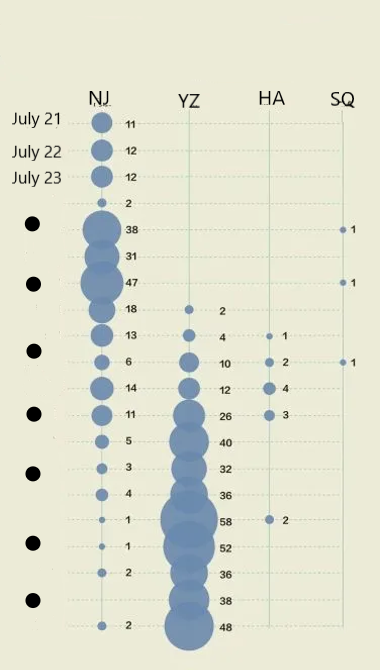

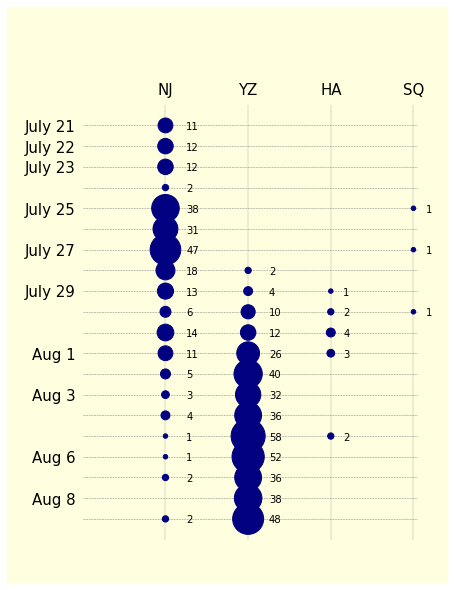

In [647]:
# Your Code Below
from matplotlib import style
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.ticker import MultipleLocator,FormatStrFormatter
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize = (6,8))

ax=plt.gca(facecolor = 'lightyellow')


ax.xaxis.set_ticks_position('top')
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tick_params(axis = 'y',bottom = False,top = False,left = False, right = False,which = 'both',)
plt.tick_params(axis = 'x',bottom = False,right= False,top = False,labelsize = 12)
x = [1,2,3,4]
y = [i for i in range(1,21)]
places = ['NJ','YZ','HA','SQ']
date = ['July 21','July 22','July 23','','July 25','','July 27','','July 29',
       '','','Aug 1','','Aug 3','','','Aug 6','','Aug 8','']
ax.set_xticks(x)
ax.set_yticks(y)
ax.set_xlim(0,4.05)
ax.set_ylim(21,0)
ax.set_yticklabels(date,fontsize = 15)
ax.set_xticklabels(places,fontsize = 15)
# ax.set_xticklabels()
x1 = [1]*19
y1 = [i for i in range(1,19)]+[20]
size1 = np.array([11,12,12,2,38,31,47,18,13,6,14,11,5,3,4,1,1,2,2])
markersize1 = np.array([11,12,12,2,38,31,47,18,13,6,14,11,5,3,4,1,1,2,2])*20
ax.scatter(x1,y1, s = markersize1,color = 'navy',zorder = 100)
for i in range(len(x1)):
    plt.annotate(size1[i],xy = (x1[i],y1[i]),xytext = (x1[i]+0.25,y1[i]+0.2),zorder = 100)

x2  = [2]*13
y2 = [i for i in range(8,21)]
size2 = np.array([2,4,10,12,26,40,32,36,58,52,36,38,48])
markersize2 = np.array([2,4,10,12,26,40,32,36,58,52,36,38,48])*20
ax.scatter(x2,y2, s = markersize2,color = 'navy',zorder = 100)
for i in range(len(x2)):
    plt.annotate(size2[i],xy = (x2[i],y2[i]),xytext = (x2[i]+0.25,y2[i]+0.2),zorder = 1000)

x3 = [3]*5
y3 = [9,10,11,12,16]
size3 = np.array([1,2,4,3,2])
markersize3 = np.array([1,2,4,3,2])*20
ax.scatter(x3,y3, s = markersize3,color = 'navy',zorder = 100)
for i in range(len(x3)):
    plt.annotate(size3[i],xy = (x3[i],y3[i]),xytext = (x3[i]+0.15,y3[i]+0.2),zorder = 1000)

x4 = [4]*3
y4 = [5,7,10]
size4 = np.array([1,1,1])
markersize4 = np.array([1,1,1])*20
ax.scatter(x4,y4, s = markersize4,color = 'navy',zorder = 100)
for i in range(len(x4)):
    plt.annotate(size4[i],xy = (x4[i],y4[i]),xytext = (x4[i]+0.15,y4[i]+0.2),zorder = 1000)


plt.grid(which = 'major',axis = 'x',color = 'grey',linestyle = '-', linewidth = 0.3,zorder = 0)
plt.grid(which = 'major',axis = 'y',color = 'grey',linestyle = '--', linewidth = 0.5,zorder = 0)

rect = plt.Rectangle((-0.05,0.05),1.02,1,fill = True,color='lightyellow',lw =0.4,zorder = -1000,figure = fig,transform = fig.transFigure)

fig.patches.extend([rect])

plt.show()

3.(20 points) Reproduce as closely as possible the following bar graphs from  (same format)
https://www.automateexcel.com/blockedfolder/charts/column_chart.xlsx
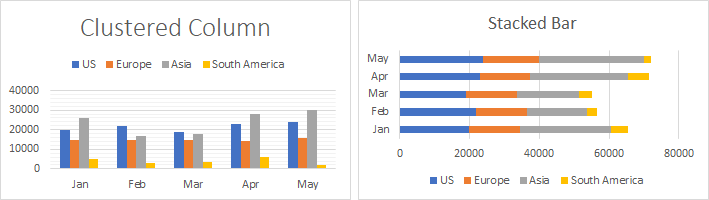

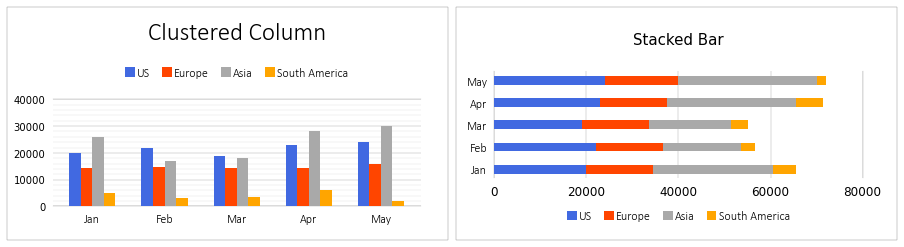

In [420]:
# Your Code Below
from matplotlib import style
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.ticker import MultipleLocator,FormatStrFormatter
import matplotlib.gridspec as gridspec

gs = gridspec.GridSpec(6,2)
df = pd.read_excel('column_chart.xlsx',sheet_name = 'Column & Bar')
US = []
Europe = []
Asia = []
SA = []
regions = [US,Europe,Asia,SA]
for i in range(len(regions)):
    for j in range(1,6):
        regions[i].append(df.loc[i+1].values[j])
months = ['Jan','Feb','Mar','Apr','May']
US = np.array(US)
Europe = np.array(Europe)
Asia = np.array(Asia)
SA = np.array(SA)


############plot the first graph
x = np.arange(len(months))
y = np.linspace(0,40000,21)
width = 0.16  ###the width of the bars
fig = plt.figure(figsize = (6,3),frameon = True, edgecolor = 'black')
ax1 = plt.subplot(gs[1:5,0])

bar1 = ax1.bar(x - width/2*3,US,width,label = "US",color = 'royalblue',zorder = 100)
bar2 = ax1.bar(x - width/2,Europe,width,label = "Europe",color = 'orangered',zorder = 100)
bar3 = ax1.bar(x + width/2,Asia,width,label = "Asia",color = 'darkgray',zorder = 100)
bar4 = ax1.bar(x + width/2*3,SA,width,label = "South America",color = 'orange',zorder = 100)
font1 = {'family' :'Calibri', 'weight': 'ultralight', 'size':25,'stretch':'ultra-condensed'}
font2 = {'family':'Calibri','size':12, 'weight': 'ultralight'}
ax1.set_title('Clustered Column',y = 1.50, font = font1)
ax1.set_xticks(x)
ax1.set_yticks(y)
ax1.set_ylim(0,40000)
ax1.set_xticklabels(months,font = font2)


ymajorLocator = MultipleLocator(10000)
# ymajorFormatter = FormatStrFormatter('%5.1f')
yminorLocator = MultipleLocator(2000)

ax1.yaxis.set_major_locator(ymajorLocator)
# ax.yaxis.set_major_formatter(ymajorFormatter)
ax1.yaxis.set_minor_locator(yminorLocator)

ax1.spines['left'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_color('grey')
ax1.spines['top'].set_linewidth('0.3')
ax1.spines['bottom'].set_color('grey')
ax1.spines['bottom'].set_linewidth('0.3')

plt.tick_params(axis = 'y',bottom = False, top = False,left = False, right = False,which = 'both',)
plt.tick_params(axis = 'x',bottom = False, top = False,labelsize = 12)

plt.grid(which = 'major',axis = 'y',color = 'grey',linestyle = '-', linewidth = 0.3,zorder = 0)
plt.grid(which = 'minor',axis = 'y',color = 'grey',linestyle = '-', linewidth = 0.1,zorder = 0)

# style.use('seaborn-ticks')

ax1.legend(loc = "upper center",bbox_to_anchor=(0.5,1.4),frameon = False,ncol=4,
         handlelength = 0.8, handleheight = 0.8,handletextpad = 0.2,columnspacing = 1,prop = font2)

# autoAxis = ax1.axis()
# rec = plt.Rectangle((autoAxis[0]-0.7,autoAxis[2]-2),(autoAxis[1]-autoAxis[0])+1,(autoAxis[3]-autoAxis[2])+1,fill = False,lw = 1)
# rec =ax1.add_patch(rec)
# rec.set_clip_on(False)
rect1 = plt.Rectangle((0.02,0.1),1.02,1.08,fill = False,color='grey',lw =0.4,zorder = 1000,figure = fig,transform = fig.transFigure)

fig.patches.extend([rect1])
plt.subplots_adjust(right =2)




ax2 = plt.subplot(gs[:4,1])


y = np.arange(len(months))
x = np.linspace(0,80000,5)
width = 0.4 
Bar1 = ax2.barh(y,US,width,label = "US",color = 'royalblue',zorder = 100)
Bar2 = ax2.barh(y,Europe,width,left = US,label = "Europe",color = 'orangered',zorder = 100)
Bar3 = ax2.barh(y,Asia,width,left = Europe + US,label = "Asia",color = 'darkgray',zorder = 100)
Bar4 = ax2.barh(y,SA,width,left = Asia + Europe + US,label = "South America",color = 'orange',zorder = 100)
ax2.set_xticks(x)
ax2.set_yticks(y)
ax2.set_yticklabels(months,font = font2)
ax2.set_title('Stacked Bar',y = 1.2, fontsize = 15)

ax2.spines['top'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.spines['left'].set_color('grey')
ax2.spines['left'].set_linewidth('0.3')
ax2.spines['right'].set_color('grey')
ax2.spines['right'].set_linewidth('0.3')

plt.tick_params(axis = 'x',bottom = False, top = False,left = False, right = False,which = 'both',labelsize = 12)
plt.tick_params(axis = 'y',bottom = False, top = False,left = False, right = False,which = 'both')

plt.grid(which = 'major',axis = 'x',color = 'grey',linestyle = '-', linewidth = 0.3,zorder = 0)

ax2.legend(loc = "lower center",bbox_to_anchor=(0.5,-0.5),frameon = False,ncol=4,
         handlelength = 0.8, handleheight = 0.8,handletextpad = 0.2,columnspacing = 1,prop = font2)

# plt.subplots_adjust(bottom = 0.7)

rect2 = plt.Rectangle((1.06,0.1),1.02,1.08,fill = False,color='grey',lw =0.4,zorder = 1000,figure = fig,transform = fig.transFigure)

fig.patches.extend([rect2])
# plt.tight_layout()
plt.show()


4. (10 points bonus)Reproduce as closely as possible the following histogram and line plot from  (same format)
https://www.automateexcel.com/blockedfolder/charts/pareto_chart.xlsx
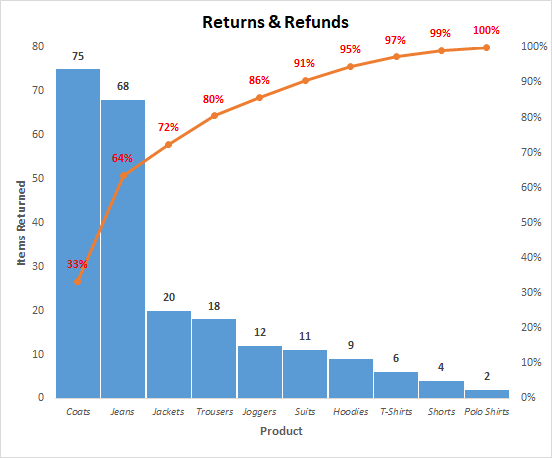

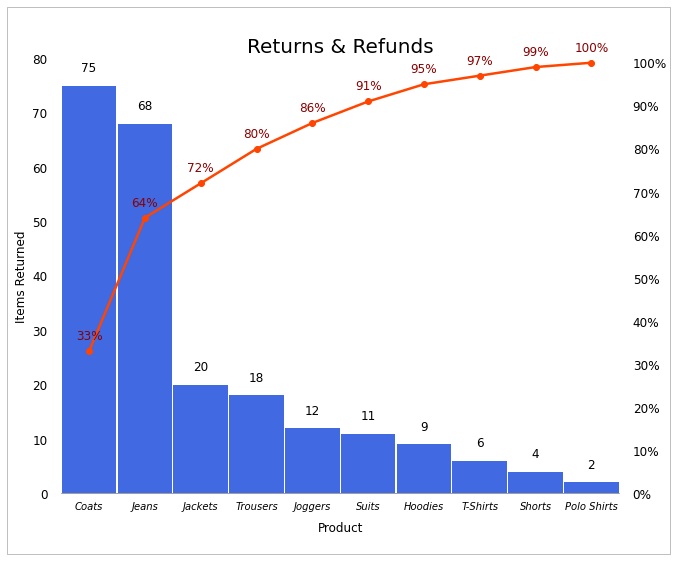

In [186]:
# Your Code Below

from matplotlib import style
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

#########prepare the data
df = pd.read_excel('pareto_chart.xlsx',sheet_name = '< 2013')

products = []
items_returned = []
cumulative = [] 
for i in range(10):
    products.append(df.loc[i].values[0])
    items_returned.append(df.loc[i].values[1])
    cumulative.append(round(df.loc[i].values[2]*100))
cum_percent = []
for cum in cumulative:
    cum_percent.append(str(cum)+'%')

    
#####draw the picture
x = np.linspace(0,9,10)

y1 = np.linspace(0,80,9)
width = 0.98
fig,ax1 = plt.subplots(figsize = (10,8))

font1 = {'style':'italic'}

bar = ax1.bar(x,items_returned,width,color = 'royalblue',zorder = 0)
ax1.set_xticks(x)
ax1.set_yticks(y1)
ax1.set_xlim(-0.5,9.5)
ax1.set_xticklabels(products,font = font1)
ax1.set_xlabel('Product',fontsize = 12,labelpad = 10)
ax1.set_ylabel("Items Returned",fontsize = 12)
ax1.set_title('Returns & Refunds', fontsize = 20)

for a,b in zip(x,items_returned):
    plt.text(a,b+2,'%.0f'%b,ha = 'center',va = 'bottom',fontsize = 12)

ax2= ax1.twinx()

y2 = np.linspace(0,100,11)
y2_labels = []
for i in range(11):
    label = str(i*10)+'%'
    y2_labels.append(label)
ax2.plot(x,cumulative,marker = 'o',color = 'orangered',linewidth = 2.5)

ax2.set_xticks(x)
ax2.set_yticks(y2)
ax2.set_ylim(0,101)
ax2.set_yticklabels(y2_labels)

for a,b in zip(x,cumulative):
    plt.text(a,b+2,'%.0f'%b+'%',ha = 'center',va = 'bottom',fontsize = 12,color = 'darkred')



ax1.spines['top'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_color('grey')
ax1.spines['bottom'].set_linewidth('0.5')
ax2.spines['top'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['bottom'].set_color('grey')
ax2.spines['bottom'].set_linewidth('0.5')
ax1.tick_params(axis = 'y',bottom = False, top = False,left = False, right = False,size = 10,labelsize =12)
ax1.tick_params(axis = 'x',bottom = False, top = False,left = False, right = False,size = 5,labelsize =10)
ax2.tick_params(axis = 'y',bottom = False, top = False,left = False, right = False,size = 10,labelsize =12)
ax2.tick_params(axis = 'x',bottom = False, top = False,left = False, right = False,size = 5,labelsize =10)


rect2 = plt.Rectangle((0.05,0.02),0.92,0.95,fill = False,color='grey',lw =0.5,zorder = 1000,figure = fig,transform = fig.transFigure)

fig.patches.extend([rect2])

plt.show()


5. (10 points bonus)Reproduce as closely as possible the following scatter plot from  (same format)
https://www.automateexcel.com/blockedfolder/charts/quadrant_chart.xlsx
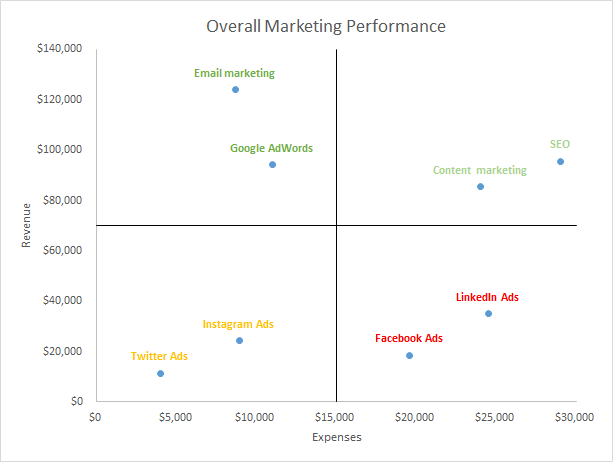

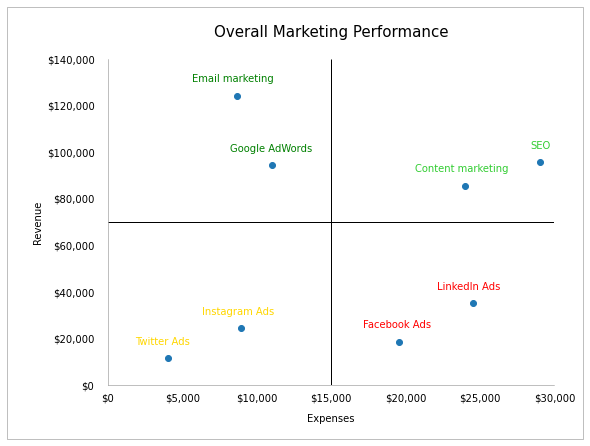

In [646]:
# Your Code Below
from matplotlib import style
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

df = pd.read_excel('quadrant_chart.xlsx',sheet_name = 'Sheet1')
MC = []
Expenses = []
Revenue = []

x = np.linspace(0,30000,7)
y = np.linspace(0,140000,8)
x_labels = ['$0','$5,000','$10,000','$15,000','$20,000','$25,000','$30,000']
y_labels = ['$0','$20,000','$40,000','$60,000','$80,000','$100,000','$120,000','$140,000']
for i in range(8):
    MC.append(df.loc[i].values[0])
    Expenses.append(df.loc[i].values[1])
    Revenue.append(df.loc[i].values[2])

fig,ax = plt.subplots(figsize = (8,6))

ax.set_xticks(x)
ax.set_yticks(y)
ax.set_xlim(0,30000)
ax.set_ylim(0,140000)
ax.set_xticklabels(x_labels)
ax.set_yticklabels(y_labels)
ax.set_xlabel('Expenses',labelpad = 10)
ax.set_ylabel('Revenue')
ax.set_title('Overall Marketing Performance', fontsize = 15,y = 1.05)
ax.scatter(Expenses,Revenue)
ax.vlines(15000,0,140000,color = 'black',lw = 1)
ax.hlines(70000,0,30000,color = 'black',lw = 1)

for i in range(len(Expenses)):
#     print(Expenses[i],Revenue[i])
    if Expenses[i]<15000 and Revenue[i]<70000:
        txt_color = 'gold'
    elif Expenses[i]<15000 and Revenue[i]>70000:
        txt_color = 'g'
    elif Expenses[i]>15000 and Revenue[i]<70000:
        txt_color = 'r'
    elif Expenses[i]>15000 and Revenue[i]>70000:
        txt_color = 'limegreen'
#     print(txt_color)
    plt.annotate(MC[i],xy = (Expenses[i],Revenue[i]),xytext = (Expenses[i]-len(MC[i])/2*400,Revenue[i]+6000),zorder = 1000,color = txt_color)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_color('grey')
ax.spines['left'].set_linewidth('0.5')
ax.spines['bottom'].set_color('grey')
ax.spines['bottom'].set_linewidth('0.5')

plt.tick_params(axis = 'y',bottom = False, top = False,left = False, 
                right = False,which = 'both', labelsize = 10,size = 10)
plt.tick_params(axis = 'x', bottom = False,top = False,left = False, right = False,which = 'both',
                color = 'gray',width = 0.4,size = 5,labelsize = 10)
rect = plt.Rectangle((-0.05,0),1,1,fill = False,color='grey',lw =0.5,zorder = 1000,figure = fig,transform = fig.transFigure)

fig.patches.extend([rect])
plt.show()

6. (10 points bonus)Reproduce as closely as possible the following area plot from  (same format)
https://www.automateexcel.com/blockedfolder/charts/area_chart.xlsx
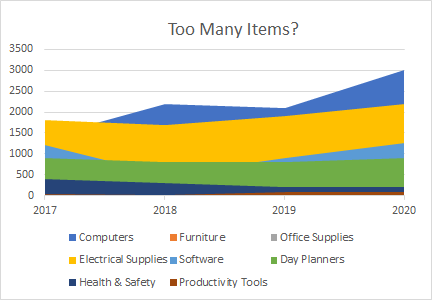

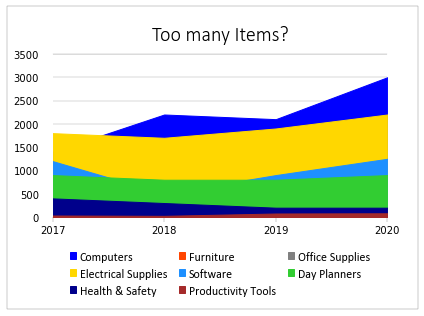

In [160]:
# Your Code Below
from matplotlib import style
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline
df = pd.read_excel('area_chart.xlsx',sheet_name = 'Too Many Items')
year = []
items = []

sort_items = ['Computers','Electrical Supplies','Health & Safety','Furniture','Software',
              'Productivity Tools','Office Supplies','Day Planners']

items_num = {}
colors = ['blue','orangered','gray','gold','dodgerblue','limegreen','darkblue','brown']
for i in range(1,5):
    year.append(int(df.loc[i].values[2]))
for i in range(3,11):
    item = df.loc[0].values[i]
    items.append(item)
    b = []
    for j in range(1,5):
        b.append(df.loc[j].values[i])
    items_num[item] = b

x = np.array(year)
y = []
y_t = np.linspace(0,3500,8)
for item in sort_items:
    y.append(items_num[item])

fig,ax = plt.subplots(figsize = (6,3),frameon = True, edgecolor = 'black')

font1 = {'family' :'Calibri', 'weight': 'ultralight', 'size':20}
font2 = {'family' :'Calibri','size':12}

for i in range(8):
    ax.stackplot(x,y[i],zorder = 1000+items.index(sort_items[i]),color = colors[items.index(sort_items[i])])
    
ax.set_title('Too many Items?',font = font1, y =1.05)
ax.set_xticks(x)
ax.set_xlabel('',font = font2)
ax.set_yticks(y_t)
ax.set_ylabel('',font = font2)
ax.set_ylim(0,3500)
ax.set_xlim(2017,2020)


ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_color('grey')
ax.spines['top'].set_linewidth('0.3')
ax.spines['bottom'].set_color('grey')
ax.spines['bottom'].set_linewidth('0.3')

plt.tick_params(axis = 'y',bottom = False, top = False,left = False, 
                right = False,which = 'both', labelsize = 10,size = 10)
plt.tick_params(axis = 'x', top = False,left = False, right = False,which = 'both',
                color = 'gray',width = 0.4,size = 5,labelsize = 10)

plt.grid(which = 'major',axis = 'y',color = 'grey',linestyle = '-', linewidth = 0.3,zorder = 0)

nlines = len(y)
ncol = int(math.ceil(nlines/3.))

ax.legend(loc = "lower center",bbox_to_anchor=(0.5,-0.55),frameon = False,ncol=3,labels = sort_items,
         handlelength = 0.5, handleheight = 0.5,handletextpad = 0.3,columnspacing = 1,prop = font2)

###draw the rectangle outside
rect1 = plt.Rectangle((0.02,-0.3),0.95,1.4,fill = False,color='grey',lw =0.4,zorder = 1000,figure = fig,transform = fig.transFigure)
fig.patches.extend([rect1])

plt.show()

7. (10 points bonus)Reproduce as closely as possible the following pie chart from  (same format)
https://www.automateexcel.com/blockedfolder/charts/gauge_chart.xlsx
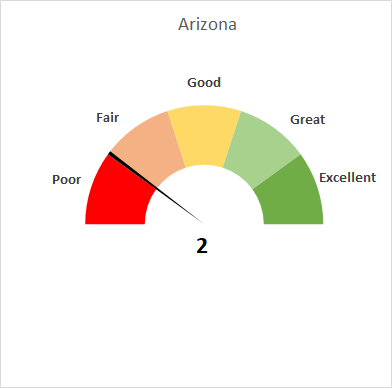

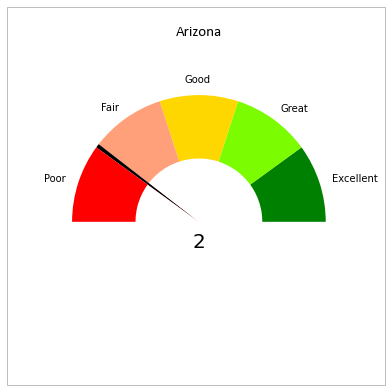

In [159]:
# Your Code Below   works well in Spyder

import matplotlib.pyplot as plt

import numpy as np

levels = ['Excellent','Great','','Fair','','Poor','']
percent = [20,20,20,19,1,20,100]

fig=plt.figure(figsize=(5,5))
plt.pie(percent,labels = levels,colors = ['g','lawngreen','gold','lightsalmon','black','r','w'],
       textprops = {'fontsize':10},labeldistance = 1.1)

plt.pie([1,199],radius = 0.5,colors = ['black','w'],startangle = 142.2)
plt.title('Arizona',pad = 50,font = {'family':'Calibri','size':'15'})
plt.text(-0.11,1.1,'Good')
plt.text(-0.05,-0.2,'2',fontsize = 20)
plt.axis('equal')

rect2 = plt.Rectangle((-0.02,0.05),1.05,1.05,fill = False,color='grey',lw =0.5,zorder = 1000,figure = fig,transform = fig.transFigure)

fig.patches.extend([rect2])
plt.show()

8. (10 points bonus)Reproduce as closely as possible the following polar plot from  (same format)
https://www.automateexcel.com/blockedfolder/charts/polar_plot.xlsx
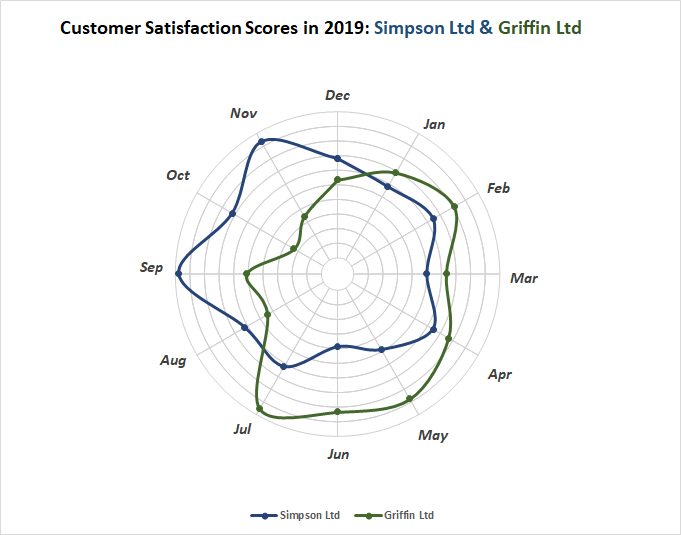

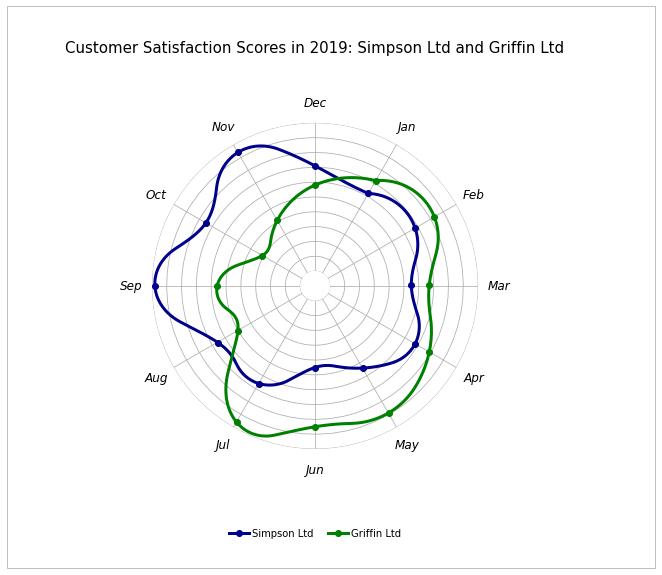

In [398]:
# Your Code Below
from matplotlib import style
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import interpolate
df = pd.read_excel('polar_plot.xlsx',sheet_name = 'Sheet1')

months = []
Simpson = []
Griffin = []

for i in range(1,13):
    months.append(df.loc[i].values[0])
    Simpson.append(df.loc[i].values[6])
    Griffin.append(df.loc[i].values[7])

theta = np.array([2*np.pi*i/12 for i in range(13)])
r1 = np.array(Simpson+[6.2])+2
r2 = np.array(Griffin+[7.2])+2


xnew = np.arange(0,2*np.pi,0.01)
markevery = [i*len(xnew)//12 for i in range(12)]

func1 = interpolate.interp1d(theta,r1,kind='quadratic')
func2 = interpolate.interp1d(theta,r2,kind='quadratic')
r1_new = func1(xnew)
r2_new = func2(xnew)

fig = plt.figure(figsize = (6,6))
ax = plt.subplot(projection = 'polar',frameon = False)
ax.bar(0,1,width = 3*np.pi,color =  'w',zorder = 100)

ax.set_thetagrids(np.arange(0, 360, 30))
ax.set_thetamin(0)  # 设置极坐标图开始角度为0°
ax.set_thetamax(360)  # 设置极坐标结束角度为180°
ax.set_theta_direction(-1)
ax.set_theta_offset(np.pi/6*2)
ax.set_rticks(np.arange(2,13,1))
ax.set_rlim(1,12)
ax.set_yticklabels([])
ax.set_xticklabels(months,size = 15,font = {'style':'italic','size':12})
ax.xaxis.set_tick_params(pad = 10)

ax.plot(xnew,r1_new,'-',label = "Simpson Ltd",marker = 'o',color = 'darkblue',markevery = markevery,lw = 3)
ax.plot(xnew,r2_new,'g-',label = "Griffin Ltd",marker = 'o',markevery = markevery,lw = 3)
ax.legend(loc = "lower center",bbox_to_anchor=(0.5,-0.3),frameon = False,ncol=2,markerfirst = True,
          markerscale =1 ,numpoints = 1,
         handlelength = 2, handleheight = 0.5,handletextpad = 0.3,columnspacing = 1.5)
ax.set_title('Customer Satisfaction Scores in 2019: Simpson Ltd and Griffin Ltd',fontsize = 15, y =1.2)

rect2 = plt.Rectangle((-0.2,-0.15),1.5,1.3,fill = False,color='grey',lw =0.5,zorder = 1000,figure = fig,transform = fig.transFigure)

fig.patches.extend([rect2])

plt.show()